In [3]:
using Unitful
using DimensionfulAngles
using DimensionfulAngles.DefaultSymbols
using LaTeXStrings:@L_str, latexstring

push!(LOAD_PATH, "../src")
using Spectra

using CairoMakie


In [4]:
Nf = 10
Δf = 0.1Hz
f = (Δf:Δf:Δf*Nf)

Nθ = 18
Δθ = 360° / Nθ
θ = (0:Nθ-1) * Δθ

S = Spectrum(abs.(randn(Nf, Nθ) .+ 0.01) * m^2 / Hz / °, f, θ);

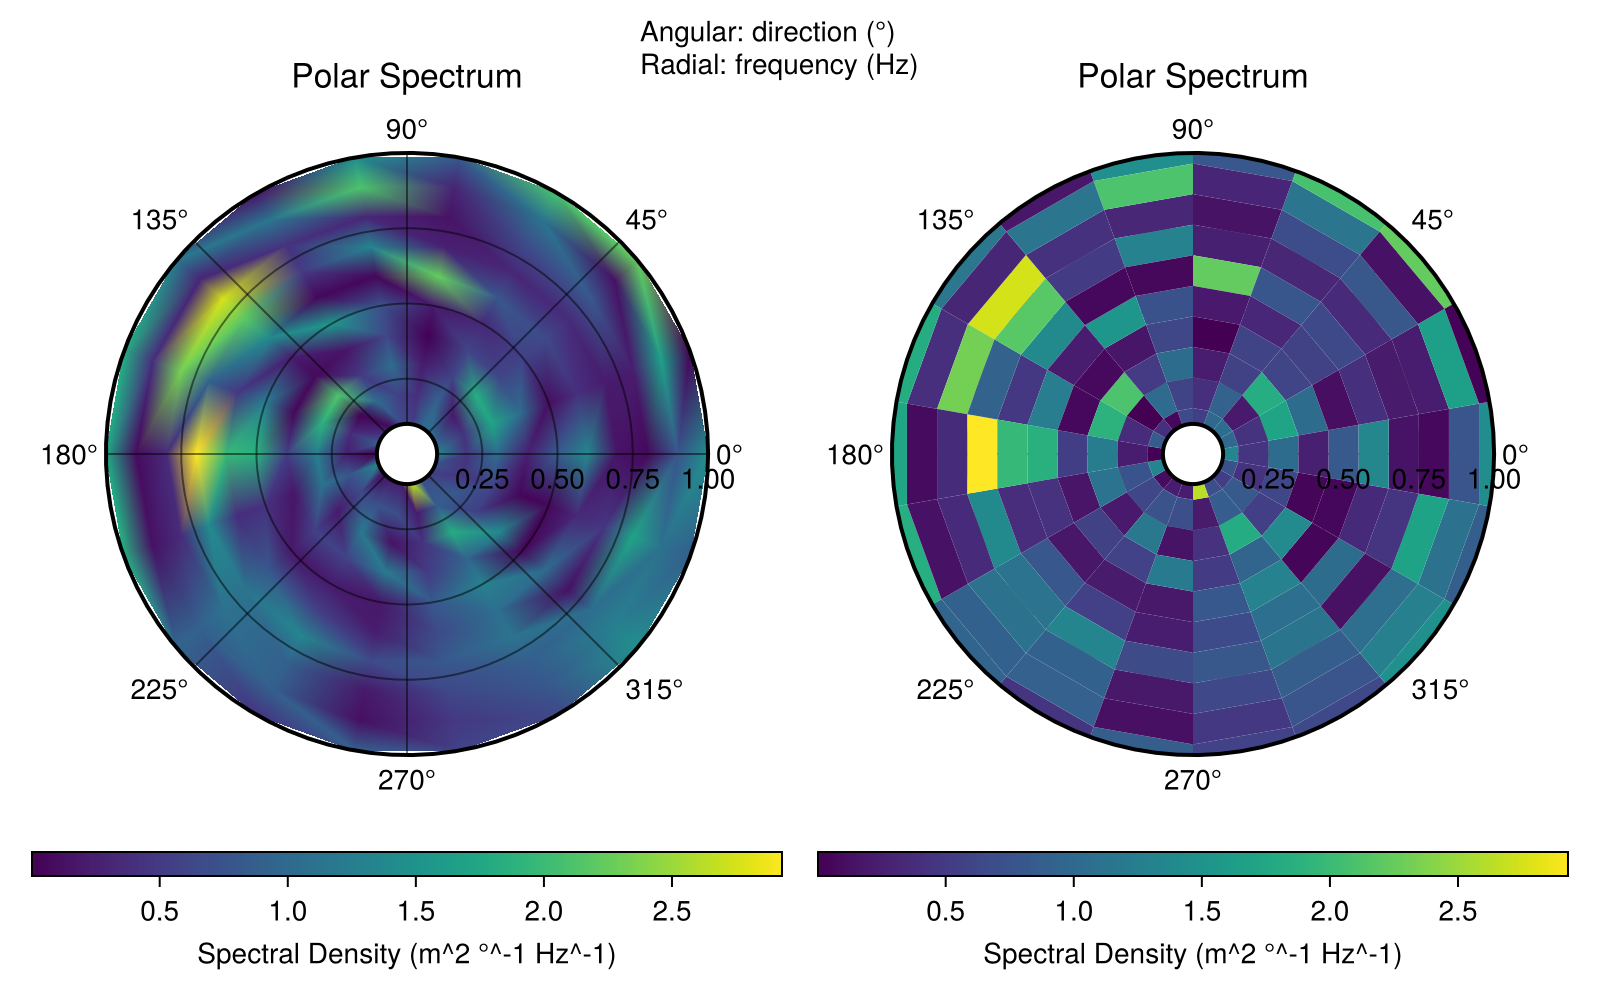

In [6]:
f = Figure(size = (800, 500))

freq = Unitful.ustrip.(S.axis1)
angle = deg2rad.(Unitful.ustrip.(S.axis2))
angle_wrapped = vcat(angle, 2pi)
S_data = transpose(Unitful.ustrip.(S.data))
S_data_wrapped = vcat(S_data, reshape(S_data[1,:], 1, :))
freq_name, angle_name = Spectra.axesnames(S)
freq_unit = Spectra.unit(S, :axis1)
angle_unit = Spectra.unit(S, :axis2)
spectrum_unit = Spectra.unit(S, :spectrum)

ax = PolarAxis(f[1,1], title = "Polar Spectrum")
p = surface!(ax, angle_wrapped, freq, zeros(size(S_data_wrapped)), color = S_data_wrapped, shading = NoShading, colormap = :viridis, depth_shift=1)
ax.gridz = 100
tightlimits!(ax) # surface plots include padding by default
rlims!(ax, minimum(freq), maximum(freq))
Colorbar(f[2, 1], p, vertical = false, flipaxis = false, label = "Spectral Density ($spectrum_unit)")
text!(f.scene, Point2f(.4, .92), text = "Angular: $angle_name ($angle_unit)\nRadial: $freq_name ($freq_unit)", space = :relative)

ax = PolarAxis(f[1,2], title = "Polar Spectrum")
p = voronoiplot!(ax, angle_wrapped, freq, S_data_wrapped, show_generators = false, strokewidth = 0)
#println(min([1, 10]))
rlims!(ax, minimum(freq), maximum(freq))
Colorbar(f[2,2], p, vertical = false, flipaxis = false, label = "Spectral Density ($spectrum_unit)")

f

In [ ]:
# Sample data for positions
positions = rand(100)  # Replace with your actual data

# Create a figure
f = Figure()

# Create an instance of MyPlot
myplot_instance = MyPlot(positions)

# Call the plot! function to render the plot
plot!(myplot_instance)

# Display the figure
display(f)

LoadError: UndefVarError: `MyPlot` not defined in `Main`
Suggestion: check for spelling errors or missing imports.